## Mounting Google Drive

To access files stored in Google Drive, we need to mount it to the Colab environment. This allows us to read, write, and manipulate files seamlessly.

In [ ]:
# Importing the necessary module from the Google Colab library to mount Google Drive.
from google.colab import drive

# Mounting the Google Drive to the Colab environment.
drive.mount('/content/drive')

## Extracting Dataset Zip File

In this section, we'll extract a dataset stored in a zip file located in our Google Drive. This dataset is essential for our project, and we'll use it for training, testing, or other purposes.


In [ ]:
import os

# Importing the 'zipfile' module to work with zip files.
import zipfile

# Specifying the path of the zip file in Google Drive and the directory to extract the contents.
zip_file_path = '/content/drive/My Drive/dataset.zip'
extraction_path = '/content/dataset'

# Extracting the contents of the zip file to the specified directory.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

## Importing Necessary Libraries

In this section, we'll import all the required libraries for our project. These libraries include tools for data manipulation, visualization, machine learning model creation, and more.


In [ ]:
# Importing 'numpy' library for numerical computations.
import numpy as np

# Importing 'pandas' library for data manipulation and analysis.
import pandas as pd

# Importing TensorFlow library for building and training deep learning models.
import tensorflow as tf

# Importing the 'ImageDataGenerator' class from Keras for data augmentation.
from keras.preprocessing.image import ImageDataGenerator

# Importing data visualization libraries.
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Importing necessary modules from Keras for building the model.
from keras.models import Sequential, load_model
from keras.layers import Dense, GlobalAvgPool2D, Dropout

## Image Data Generator

Here, we define an `ImageDataGenerator` object named `gen`. This object is responsible for generating batches of image data with real-time data augmentation. The parameters specified include:

- `rescale`: Rescales the pixel values of the images to the range [0, 1] by dividing each pixel value by 255.
- `validation_split`: Splits the data into training and validation sets, with 80% of the data used for training and 20% for validation.


In [ ]:
# Image Data Generator for data preprocessing and augmentation.
gen = ImageDataGenerator(
    rescale=1./255,            # Rescaling pixel values to the range [0, 1].
    validation_split=0.2       # Splitting the data into training and validation sets.
)

In [ ]:
rootpath = '/content/dataset/dataset' # defining the rootpath

## Flow From Directory

The `flow_from_directory` method generates batches of augmented data from image files in a directory. Here, we create a training dataset named `train_ds` using the following parameters:

- `rootpath`: The directory path containing the image files.
- `target_size`: Resizes the images to the specified dimensions of (875, 656) pixels.
- `subset`: Specifies that this dataset is a subset of the data, in this case, the training set.
- `batch_size`: The number of samples in each batch.
- `shuffle`: Shuffles the data randomly.
- `class_mode`: Defines the type of labels, which is set to 'binary' indicating binary classification.


In [ ]:
# Generating batches of augmented data from image files in the directory for training.
train_ds = gen.flow_from_directory(
    rootpath,                     # Directory path containing the image files.
    target_size=(875, 656),       # Resizing images to (875, 656) pixels.
    subset='training',            # Specifying that this is the training subset.
    batch_size=32,                # Number of samples in each batch.
    shuffle=True,                 # Shuffling the data randomly.
    class_mode='binary'           # Labels are binary (binary classification).
)

Found 2401 images belonging to 2 classes.


## Flow From Directory

Similar to the training dataset, the `flow_from_directory` method is used to generate batches of augmented data from image files in a directory for the validation dataset. Here, we create a validation dataset named `valid_ds` with the following parameters:

- `rootpath`: The directory path containing the image files.
- `target_size`: Resizes the images to the specified dimensions of (875, 656) pixels.
- `subset`: Specifies that this dataset is a subset of the data, in this case, the validation set.
- `batch_size`: The number of samples in each batch.
- `shuffle`: Shuffles the data randomly.
- `class_mode`: Defines the type of labels, which is set to 'binary' indicating binary classification.


In [ ]:
# Generating batches of augmented data from image files in the directory for validation.
valid_ds = gen.flow_from_directory(
    rootpath,                     # Directory path containing the image files.
    target_size=(875, 656),       # Resizing images to (875, 656) pixels.
    subset='validation',          # Specifying that this is the validation subset.
    batch_size=32,                # Number of samples in each batch.
    shuffle=True,                 # Shuffling the data randomly.
    class_mode='binary'           # Labels are binary (binary classification).
)

Found 599 images belonging to 2 classes.


## Get Class Names

To retrieve the class names from the dataset directory, we use the `os.listdir` function to list all the directories present in the root path and select the first two directories as class names. These class names represent the categories or labels of the images in the dataset.


In [ ]:
# Retrieve class names from the dataset directory
class_names = os.listdir(rootpath)[:2]
class_names

['signal', 'noise']

## Class Distribution Visualization

To visualize the distribution of classes in the dataset, we first calculate the number of images in each class using a list comprehension. Then, we create a pie chart using Plotly Express to display the distribution of classes.


In [ ]:
# Calculate the number of images in each class
class_dis = [len(os.listdir(rootpath + "/" + name)) for name in class_names]

# Plot the class distribution
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

## Model Architecture Definition

The following code defines the architecture of the convolutional neural network (CNN) model using TensorFlow and Keras. Below are the key features of the model:

- Utilizes odd-sized filters (3x3) for convolutional layers.
- Applies batch normalization before dropout and after activation to improve convergence and speed up training.
- Initiates with smaller filter sizes and gradually increases filter width to capture more complex features.
- Reduces the number of channels initially and gradually increases them in subsequent layers.
- Adds padding='same' parameter to convolutional layers to preserve border information.
- Implements multiple convolutional layers followed by max-pooling layers to downsample the feature maps.
- Incorporates a flattening layer to convert the 2D feature maps into a 1D vector.
- Includes dropout regularization with a dropout rate of 0.4 to prevent overfitting.
- Concludes with a dense layer with a sigmoid activation function to output binary classification results.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(875, 656, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(512),
    layers.Dropout(0.4),
    layers.Dense(1, activation="sigmoid"),
])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 875, 656, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 437, 328, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 437, 328, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 437, 328, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 218, 164, 64)      0         
 g2D)                                                            
                                                      

## Model Training

The code below compiles and trains the defined CNN model using the specified parameters. Here's a breakdown of the process:

- **Epochs**: The number of epochs is set to 12, indicating the number of passes through the entire training dataset during training.
- **Loss Function**: Utilizes binary cross-entropy loss, suitable for binary classification tasks.
- **Optimizer**: Employs the Adam optimizer, a popular choice for training neural networks due to its adaptive learning rate and momentum.
- **Metrics**: Evaluates model performance during training using accuracy as the evaluation metric.
- **Training**: The model is trained using the `fit()` function, providing the training and validation datasets (`train_ds` and `valid_ds`), along with the number of epochs.


In [ ]:
epochs = 12

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# Train the model
hist = model.fit(train_ds, validation_data=valid_ds, epochs=epochs)

Epoch 1/12
76/76 [==============================] - 95s 1s/step - loss: 9.0776 - accuracy: 0.9584 - val_loss: 1074.7885 - val_accuracy: 0.4391
Epoch 2/12
76/76 [==============================] - 94s 1s/step - loss: 2.6311e-29 - accuracy: 1.0000 - val_loss: 1756.3064 - val_accuracy: 0.4391
Epoch 3/12
76/76 [==============================] - 94s 1s/step - loss: 1.4336e-21 - accuracy: 1.0000 - val_loss: 2042.4738 - val_accuracy: 0.4391
Epoch 4/12
76/76 [==============================] - 91s 1s/step - loss: 1.3323 - accuracy: 0.9892 - val_loss: 2959.0898 - val_accuracy: 0.4391
Epoch 5/12
76/76 [==============================] - 91s 1s/step - loss: 0.1057 - accuracy: 0.9992 - val_loss: 2340.2415 - val_accuracy: 0.4391
Epoch 6/12
76/76 [==============================] - 89s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1806.0253 - val_accuracy: 0.4391
Epoch 7/12
76/76 [==============================] - 92s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1166.6602 - val_

## Training and Validation Visualization

The code below plots the training and validation accuracy as well as the training and validation loss over the epochs. These plots provide insights into the model's performance and its training dynamics.


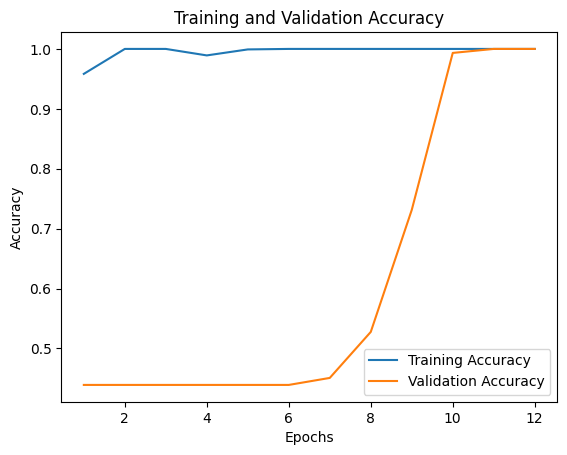

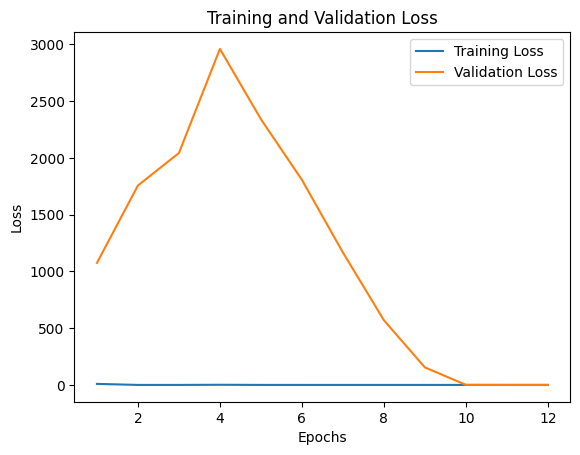

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Get training and validation loss
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plot training and validation accuracy
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction on Field Data

The following code snippet loads a spectrogram image, preprocesses it, and makes predictions using the trained model. It then prints the predicted class.


In [ ]:
import cv2
import numpy as np

# Load and preprocess the spectrogram image
image_path = "/content/drive/MyDrive/spectrogram.png"
image = cv2.imread(image_path)
image = cv2.resize(image, (656, 875))
image = image / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class
predicted_class = class_names[np.argmax(predictions)]

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 28ms/step
Predicted class: signal


In [ ]:
import cv2
import numpy as np

image_path = "/content/drive/MyDrive/spectrogram1.png"
image = cv2.imread(image_path)
image = cv2.resize(image, (656, 875))
image = image / 255.0


image = np.expand_dims(image, axis=0)

predictions = model.predict(image)

predicted_class = class_names[np.argmax(predictions)]

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 70ms/step
Predicted class: signal


## Saving the trained model

In [ ]:
# Save the trained model
model.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



## Downloading the model

In [ ]:
from google.colab import files

# Download the saved model file
files.download("trained_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>